In [63]:
#Import all needed libraries for lab
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [102]:
movie_fp = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/movie_weekend/movie_weekend.csv'
df = pd.read_csv(movie_fp)

# Data Cleansing

First we run info to check data types and for completness. 

In [104]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 5 columns):
NUMBER                 1254 non-null float64
MOVIE                  1254 non-null object
WEEK_NUM               1254 non-null float64
WEEKEND_PER_THEATER    1254 non-null float64
WEEKEND_DATE           1254 non-null object
dtypes: float64(3), object(2)
memory usage: 50.1+ KB


,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
0,1.0,A Beautiful Mind,1.0,701.0,12/21/01
1,1.0,A Beautiful Mind,2.0,14820.0,12/28/01
2,1.0,A Beautiful Mind,3.0,8940.0,1/4/02
3,1.0,A Beautiful Mind,4.0,6850.0,1/11/02
4,1.0,A Beautiful Mind,5.0,5280.0,1/18/02


From this we see that the date is an object. We will want to convert that to a datetime datatype for analysis later. 
Looking into the missing values we see that these columns are completley blank and can be removed from the dataset. 

In [105]:
df[df.MOVIE.isnull()]

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
496,NaN,NaN,NaN,NaN,NaN
498,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN
502,NaN,NaN,NaN,NaN,NaN
504,NaN,NaN,NaN,NaN,NaN
506,NaN,NaN,NaN,NaN,NaN
508,NaN,NaN,NaN,NaN,NaN
510,NaN,NaN,NaN,NaN,NaN
512,NaN,NaN,NaN,NaN,NaN
514,NaN,NaN,NaN,NaN,NaN


To fix this we will apply a mask to filter out these rows and reassign the data frame. We will also add new columns
for the date parts and recast the date to complete the data cleansing stage.

In [106]:
#Filter out the null values from the DF and create new columns parsing out the date by part. 
df= df[~df.MOVIE.isnull()]
df['WEEKEND_DATE'] = pd.to_datetime(df['WEEKEND_DATE'])
df['MONTH'] = df['WEEKEND_DATE'].map(lambda val: val.month)
df['WEEK'] = df['WEEKEND_DATE'].map(lambda val: val.week)
df['DAY'] = df['WEEKEND_DATE'].map(lambda val: val.day)
df['YEAR'] = df['WEEKEND_DATE'].map(lambda val: val.year)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 0 to 1280
Data columns (total 9 columns):
NUMBER                 1254 non-null float64
MOVIE                  1254 non-null object
WEEK_NUM               1254 non-null float64
WEEKEND_PER_THEATER    1254 non-null float64
WEEKEND_DATE           1254 non-null datetime64[ns]
MONTH                  1254 non-null int64
WEEK                   1254 non-null int64
DAY                    1254 non-null int64
YEAR                   1254 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 98.0+ KB


# Data Exploration

The first question we wanted to address is which movies remained in the top 10 the longest. We decided represent 
by the movies that had the longest run. 

In [107]:
df.groupby(['MOVIE'])[['WEEK_NUM']].count().reset_index().sort_values('WEEK_NUM',ascending=False).head(10)

,MOVIE,WEEK_NUM
7,ET,52
31,Raiders of the Lost Ark,43
32,Return of the Jedi,42
9,Forrest Gump,42
50,Titanic,41
1,American Beauty,38
4,Chicago,36
35,Shakespeare in Love,33
3,Beverly Hills Cop,33
11,Gladiator,33


The second question we looked to address is which movies were good investments. We decided to represent this by the
movies that had the largest total box office sales. 

<img src="https://files.slack.com/files-pri/T0351JZQ0-F1YQUCA6Q/giphy-1.gif">

<img src="https://files.slack.com/files-pri/T0351JZQ0-F1YR8SQAD/giphy-2.gif">

In [108]:
df.groupby(['MOVIE'])[['WEEKEND_PER_THEATER']].sum().sort_values('WEEKEND_PER_THEATER', ascending = False).reset_index().head(10)

,MOVIE,WEEKEND_PER_THEATER
0,Star Wars,228181.0
1,ET,201257.0
2,"Empire Strikes Back, The",178013.0
3,American Beauty,165891.0
4,Titanic,165701.0
5,Return of the Jedi,163572.0
6,Million Dollar Baby,154115.0
7,Chicago,146062.0
8,Raiders of the Lost Ark,144778.0
9,Forrest Gump,128534.0


3) Are there any trends throughout the year?

Findings: The graph below shows the box office sales by month. From this we see that the summeer months have the higest ticket sales. Christmas/New year also see increased sales. 

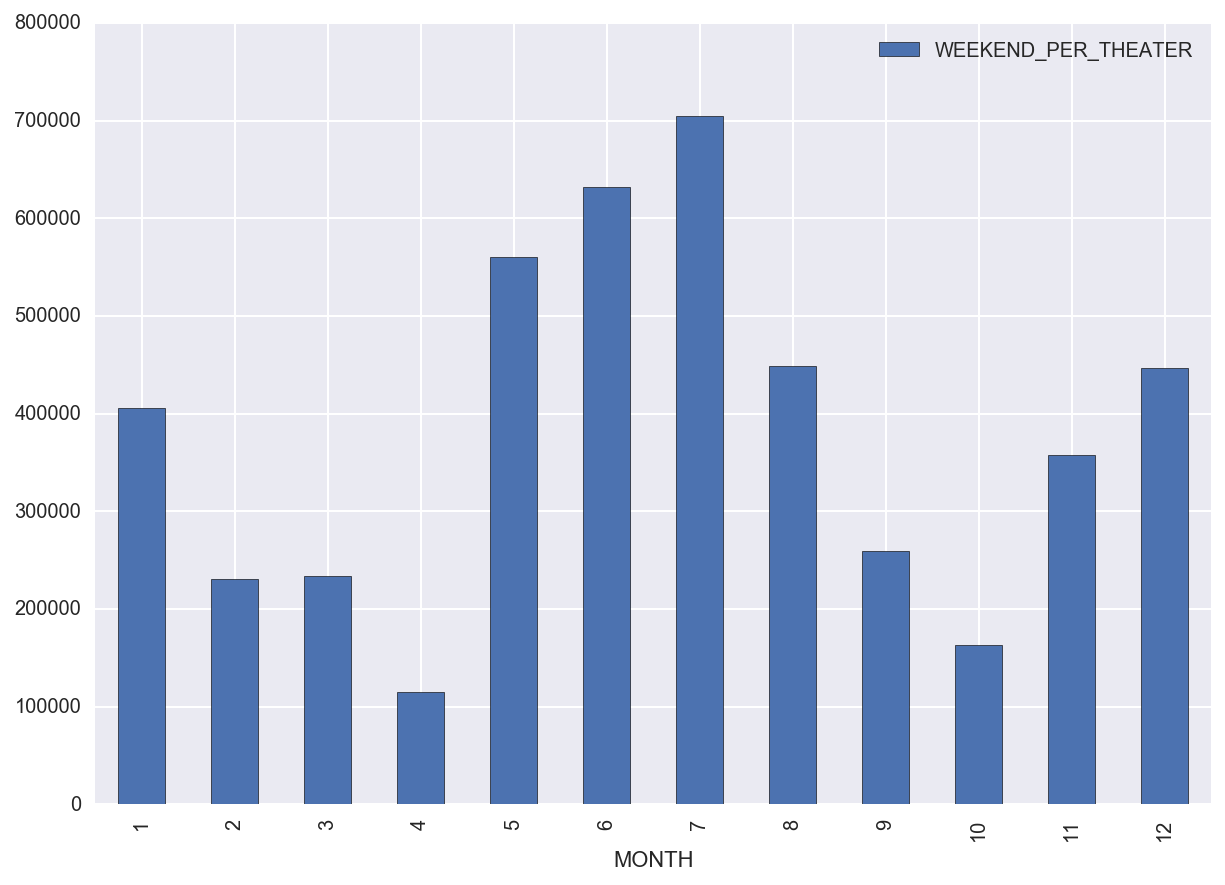

In [110]:
df.groupby(['MONTH'])[['WEEKEND_PER_THEATER']].sum().plot(kind = 'bar', figsize = (10,7))

4) Do holidays impact sales and how should we leverage that. 

Analysis: 
    
21st Week: Memorial Day

27th Week: 4th of July

52nd Week: X-Mas/New Year

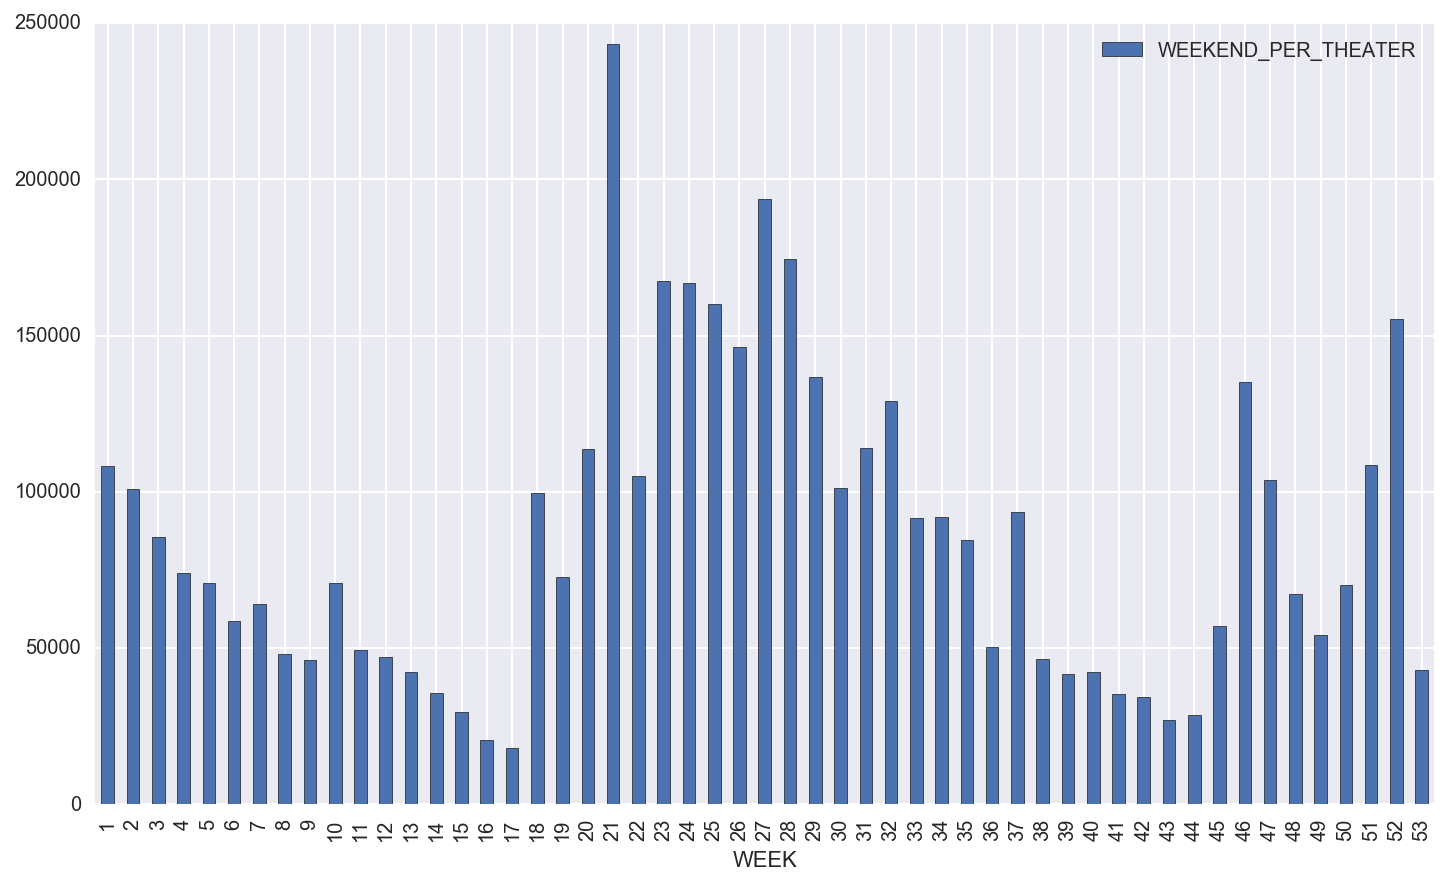

In [112]:
df.groupby(['WEEK'])[['WEEKEND_PER_THEATER']].sum().plot(kind = 'bar', figsize=(12,7))

<img src="https://media.giphy.com/media/y6Q3BkekSVR6w/giphy.gif">

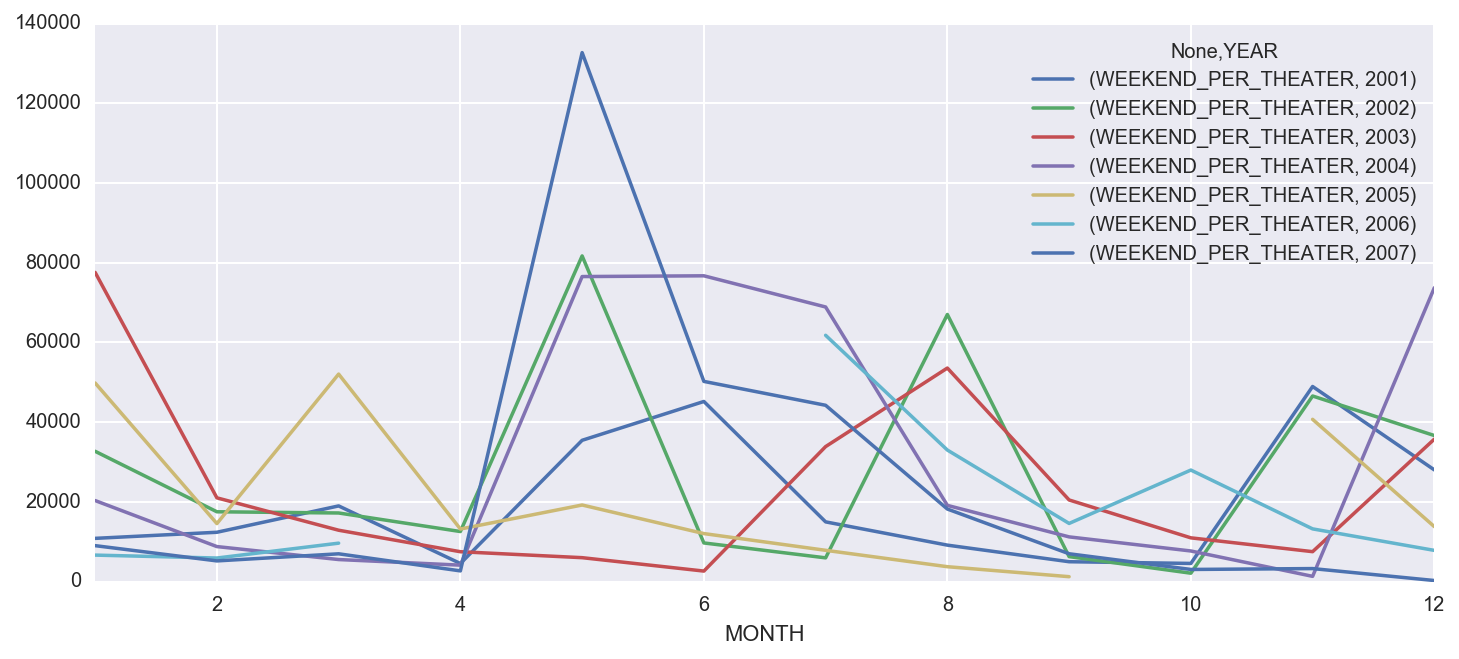

In [120]:
df[df['YEAR']>2000].groupby(['MONTH','YEAR'])[['WEEKEND_PER_THEATER']].sum().unstack().plot(kind = 'line', figsize=(12,5),)